In [6]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import xarray as xr
import pickle
import numpy as np

In [7]:
data_home = "/Users/emiliolr/Google Drive/My Drive/GTC"
lat = '60S'

# ecco_streamfunction = xr.open_dataset(f"{data_home}/streamfunctions_ecco/{lat}/PSI_residual{lat}.nc")
# ecco_streamfunction

ecco_streamfunction_fp = f"{data_home}/ecco_data_minimal/{lat}_moc_density.pickle"

with open(ecco_streamfunction_fp, 'rb') as f:
    ecco_streamfunction = pickle.load(f)

ecco_streamfunction = np.expand_dims(ecco_streamfunction[1, : ], 1) # grabbing just 60S
ecco_streamfunction = xr.Dataset(data_vars = {'moc' : (["time", "latitude"], ecco_streamfunction)}, coords = {'time' : [i for i in range(len(ecco_streamfunction))], 'latitude' : np.atleast_1d(-60)})
ecco_streamfunction

<xarray.Dataset>
Dimensions:   (time: 312, latitude: 1)
Coordinates:
  * time      (time) int64 0 1 2 3 4 5 6 7 8 ... 304 305 306 307 308 309 310 311
  * latitude  (latitude) int64 -60
Data variables:
    moc       (time, latitude) float64 -13.44 -14.53 -6.054 ... 1.92 -15.98

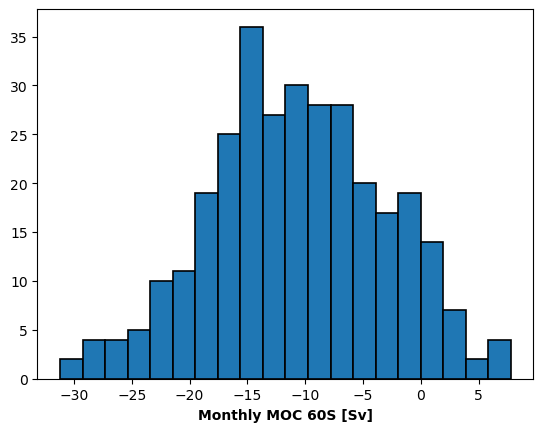

In [11]:
moc = ecco_streamfunction.moc.squeeze().values

plt.hist(moc, log = False, edgecolor = 'black', linewidth = 1.2, bins = 20)

plt.xlabel(f'Monthly MOC {lat} [Sv]', weight = 'bold');
# plt.title(f'Min: {round(float(min(moc)), 3)}, Max: {round(float(max(moc)), 3)}');

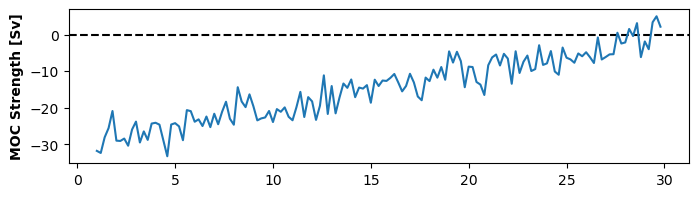

In [37]:
# Plotting a hypothetical slowdown for presentation to Ali
t = np.arange(1, 30, 0.2)
y = (-30 + 1 * t) + np.random.normal(0, 3, len(t))

plt.figure(figsize = (8, 2))

plt.axhline(0, linestyle = '--', color = 'black')
plt.plot(t, y)

plt.ylabel('MOC Strength [Sv]', weight = 'bold');